In [ ]:
import polars as pl
import os
from matplotlib import pyplot as plt
import numpy as np


The directory "figures/2025-06-16 13:49:15.548298" already exists!
Total 2424 csv files


The directory "figures/2025-06-16 13:49:15.548298" already exists!
Total 3696 csv files


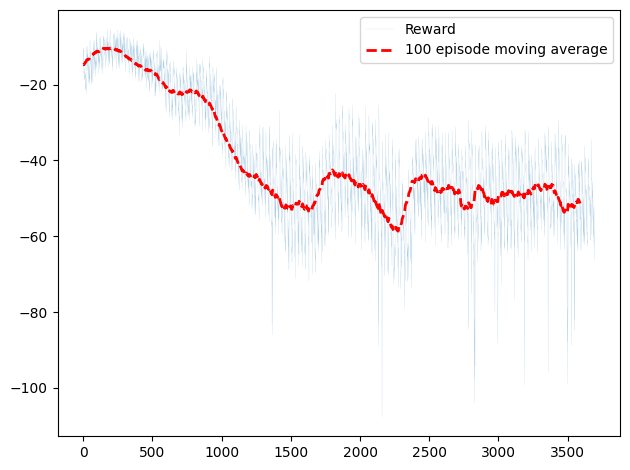

In [123]:

target_dir = (
    "result/PPO/2025-06-16 13:49:15.548298"
)

data_dir = os.path.join(target_dir, "csvs")

SAVE_DIR = os.path.join('figures', os.path.basename(target_dir))

try:
    os.makedirs(SAVE_DIR)
except FileExistsError:
    print(f"The directory \"{SAVE_DIR}\" already exists!")


target_files = os.listdir(data_dir)

target_files = [os.path.join(data_dir, target_file) for target_file in target_files]

target_files.sort()

print(f"Total {len(target_files)} csv files")
result_dfs = []

for target_file in target_files[:-1]:
    try:
        result_dfs.append(pl.scan_csv(target_file).collect())
    except Exception as e:
        print(f"Failed to read {target_file}: {e}")

def moving_average(x, w):
    return np.convolve(x, np.ones(w), "valid") / w


simple_reward_sum = np.array([result_df[:, "Reward"].sum() for result_df in result_dfs])
ma_reward_sum = moving_average(simple_reward_sum, 100)

episode_max = 10000
plt.plot(simple_reward_sum[:episode_max], lw=0.1, alpha=0.5, label="Reward")
plt.plot(ma_reward_sum[:episode_max], ls="--", lw=2.0, color="red", label="100 episode moving average")
# plt.ylim([-40, 0])
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "reward_sum.pdf"))
plt.show()

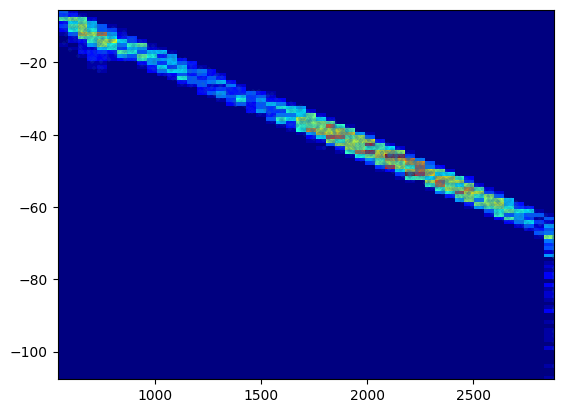

In [ ]:
plt.hist2d([len(df) for df in result_dfs], [df["Reward"].sum() for df in result_dfs], bins=(50, 100), cmap=plt.cm.jet, alpha=1.0)
# plt.scatter([len(df) for df in result_dfs], [df["Reward"].sum() for df in result_dfs], alpha=0.1, s=10, marker='+')
plt.show()

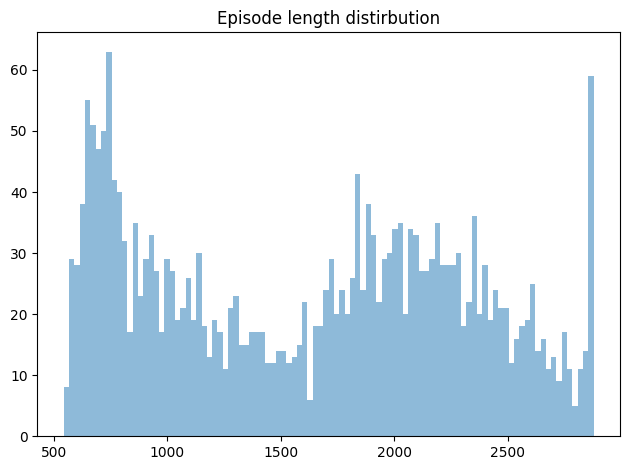

In [95]:
plt.hist([len(df) for df in result_dfs], bins=100, alpha=0.5)
plt.title("Episode length distirbution")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "Episode length.pdf"))
plt.show()

In [96]:
from copy import deepcopy

result_dfs_by_reward = deepcopy(result_dfs)

result_dfs_by_reward.sort(key=lambda df: sum(df['Reward']), reverse=True)

display(result_dfs_by_reward[0])

Previous_obs_0,Previous_obs_1,Previous_obs_2,Previous_obs_3,Previous_obs_4,Previous_obs_5,Previous_obs_6,Previous_obs_7,Previous_obs_8,Previous_obs_9,Previous_obs_10,Current_obs_0,Current_obs_1,Current_obs_2,Current_obs_3,Current_obs_4,Current_obs_5,Current_obs_6,Current_obs_7,Current_obs_8,Current_obs_9,Current_obs_10,Act_0,Act_1,Act_2,Reward
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64
0.482752,0.051522,0.008923,0.4911127,0.475793,0.165,0.0,0.385,0.007318,0.5995698,0.592758,0.486648,0.050948,0.009038,0.108261,0.087825,0.440569,0.0,0.076917,0.002116,0.5993962,0.592624,-0.531996,-0.142647,1,-0.009308
0.486648,0.050948,0.009038,0.108261,0.087825,0.440569,0.0,0.076917,0.002116,0.5993962,0.592624,0.4801305,0.049788,0.009038,0.255399,0.240448,0.0,0.248894,0.197906,0.003497,0.5992226,0.5922806,0.136305,0.3324069,0,-0.027514
0.4801305,0.049788,0.009038,0.255399,0.240448,0.0,0.248894,0.197906,0.003497,0.5992226,0.5922806,0.478157,0.048818,0.011861,0.418446,0.403322,0.1885215,0.0,0.325109,0.00737,0.599049,0.591716,1.1369795,0.4560042,0,-0.00853
0.478157,0.048818,0.011861,0.418446,0.403322,0.1885215,0.0,0.325109,0.00737,0.599049,0.591716,0.485063,0.05062,0.016031,0.5298979,0.5130041,0.190559,0.0,0.409441,0.011063,0.598875,0.5910054,0.575528,-2.339084,0,-0.001162
0.485063,0.05062,0.016031,0.5298979,0.5130041,0.190559,0.0,0.409441,0.011063,0.598875,0.5910054,0.483048,0.050594,0.014181,0.085633,0.062942,0.501798,0.0,0.055755,0.002982,0.5987018,0.5909086,-0.531279,0.305729,0,-0.005793
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.4755698,0.04842,0.056241,0.107996,0.088248,0.427602,0.0,0.058817,0.011977,0.497313,0.3333076,0.486207,0.049651,0.082095,0.674529,0.6609193,0.105467,0.0,0.4267819,0.066845,0.497139,0.332567,-2.080927,-1.793097,0,-0.035833
0.486207,0.049651,0.082095,0.674529,0.6609193,0.105467,0.0,0.4267819,0.066845,0.497139,0.332567,0.4743996,0.050567,0.063929,0.083233,0.066791,0.36,0.0,0.04,0.011878,0.496966,0.3324972,0.2542475,0.6470281,0,-0.043306
0.4743996,0.050567,0.063929,0.083233,0.066791,0.36,0.0,0.04,0.011878,0.496966,0.3324972,0.4826348,0.049026,0.0820878,0.623352,0.6093765,0.126727,0.0,0.398698,0.059143,0.496792,0.331805,0.796554,0.9750608,0,-0.045748


In [97]:
obs_names = [
    "T_feed",
    "C_feed",
    "C_pipe_c_out",
    "P_m_in",
    "P_m_out",
    "Q_circ",
    "Q_disp",
    "Q_perm",
    "C_perm",
    "time_remaining",
    "V_perm_remaining",
]

action_names = [
    "Q_0",
    "R_sp",
    "mode",
]

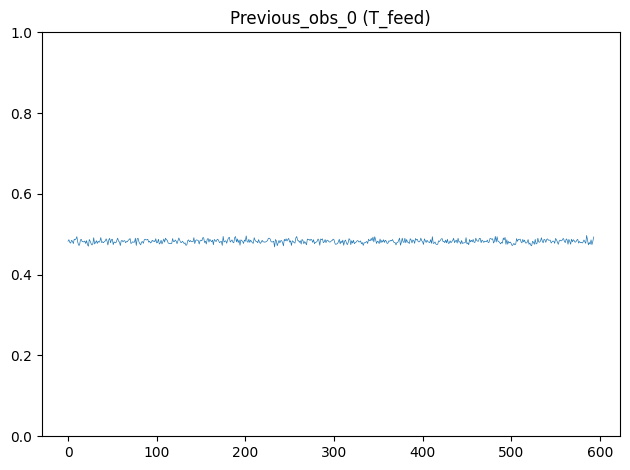

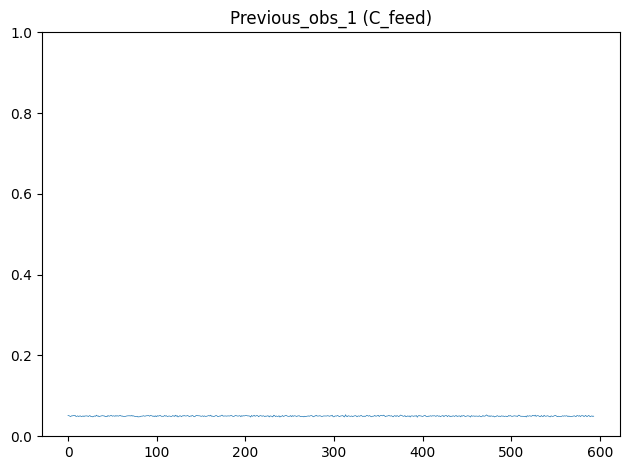

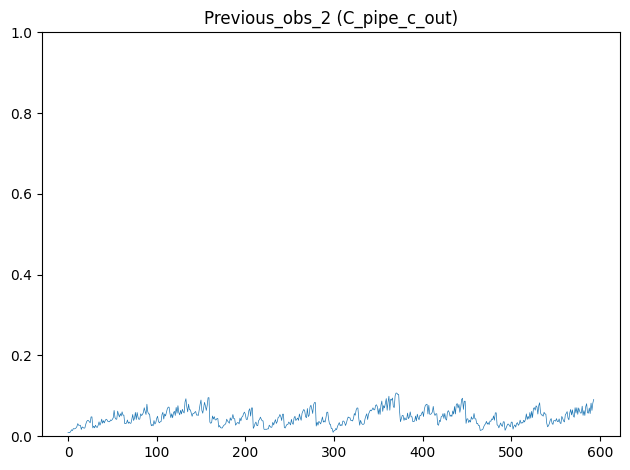

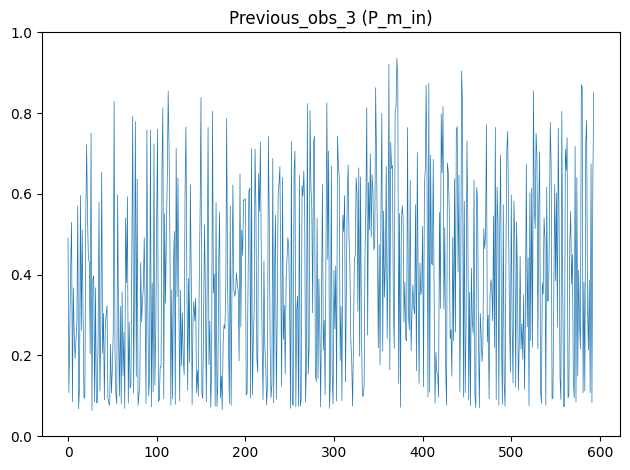

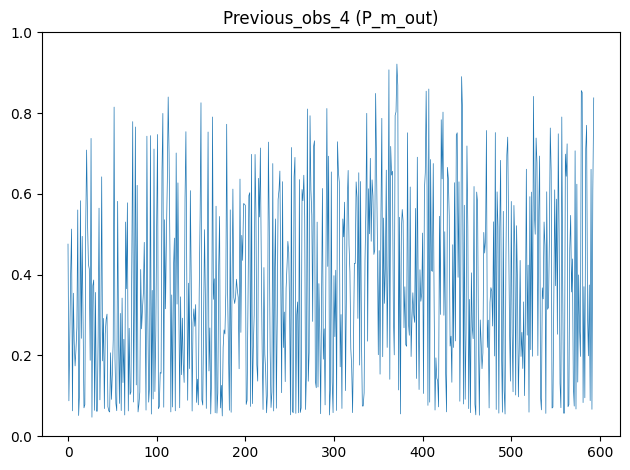

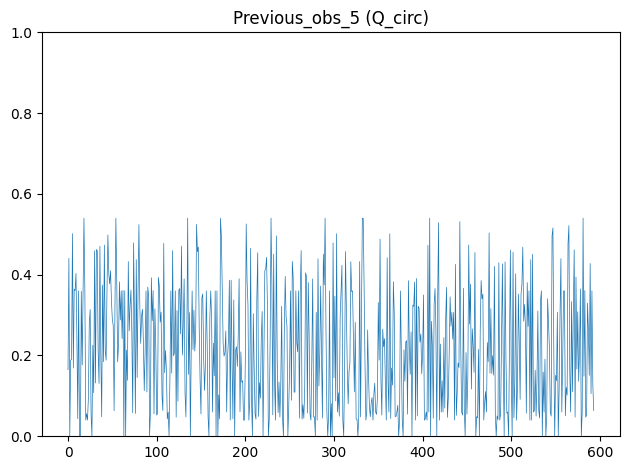

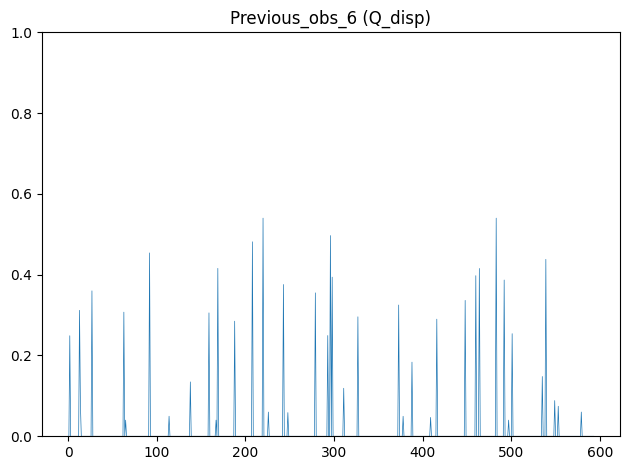

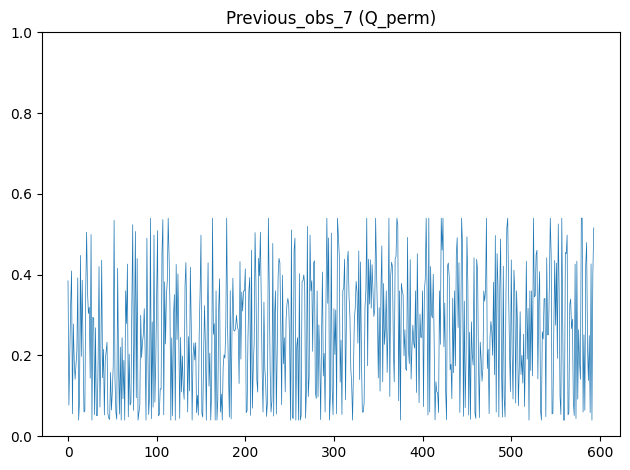

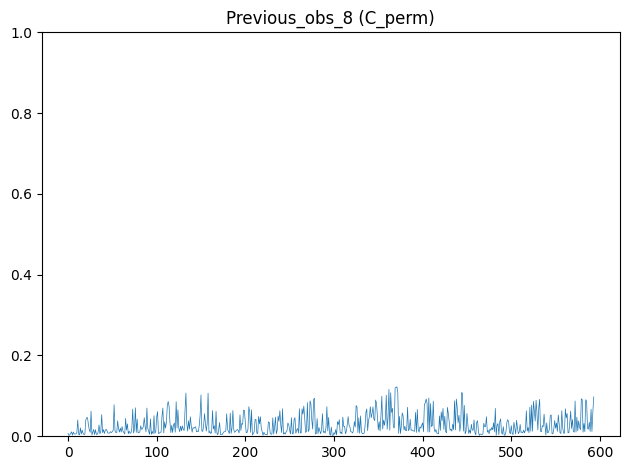

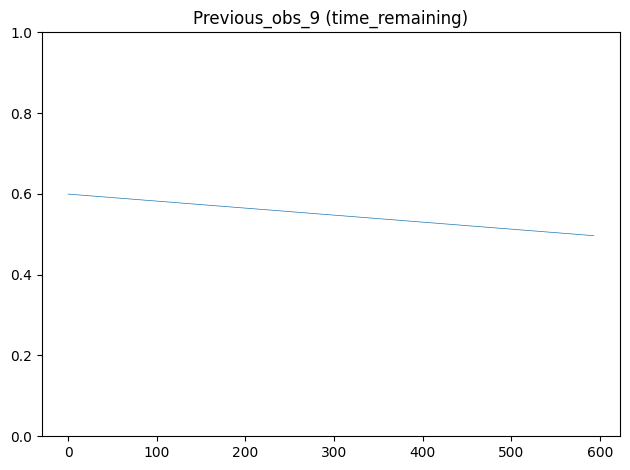

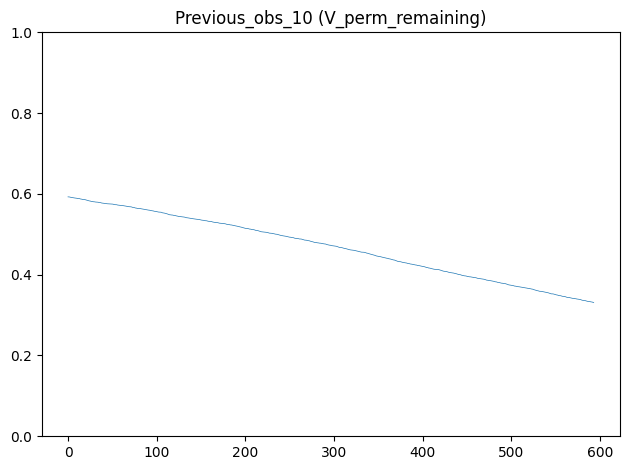

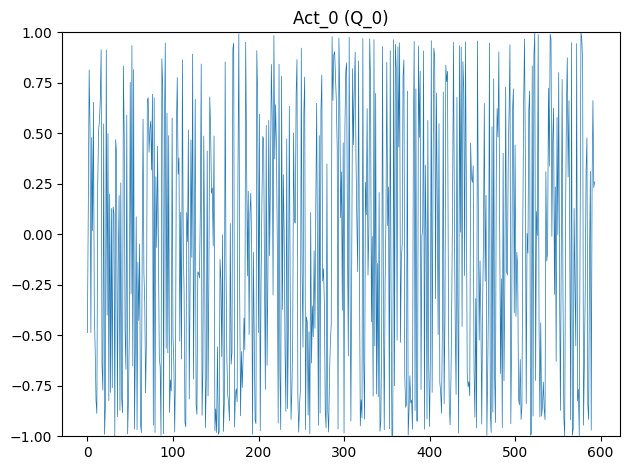

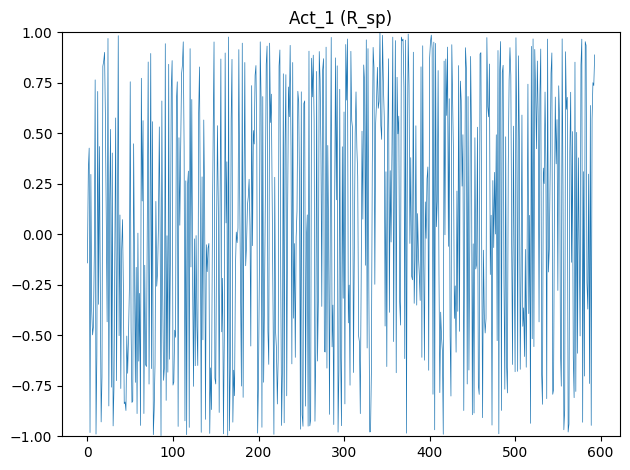

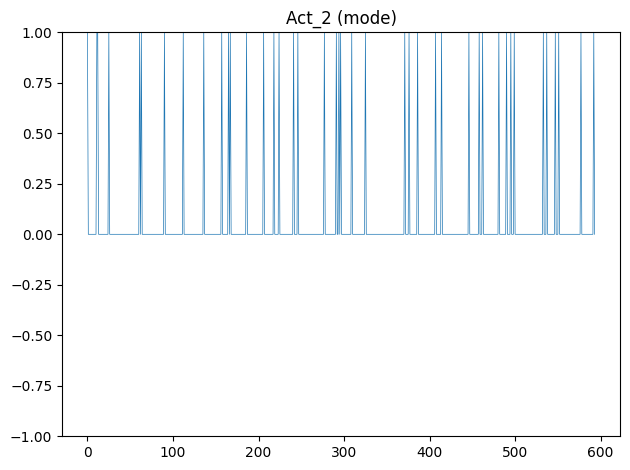

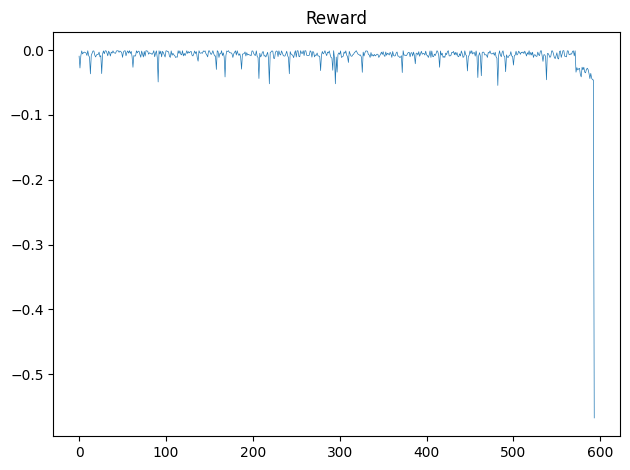

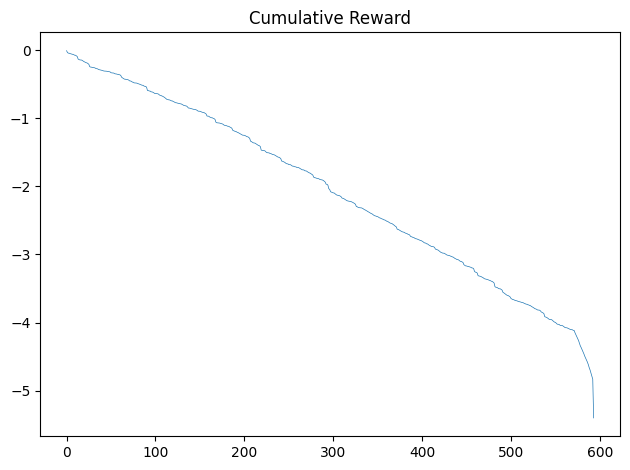

In [107]:
episode_n = 0

for i in range(11):
    plt.plot(result_dfs_by_reward[episode_n][f"Previous_obs_{i}"], lw=0.5)
    plt.title(f"Previous_obs_{i} ({obs_names[i]})")
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"Previous_obs_{i} ({obs_names[i]}).pdf"))
    plt.show()

for j in range(2):
    plt.plot(np.tanh(result_dfs_by_reward[episode_n][f"Act_{j}"]), lw=0.5)
    plt.title(f"Act_{j} ({action_names[j]})")
    plt.ylim([-1, 1])
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"Act_{j} ({action_names[j]}).pdf"))
    plt.show()

plt.plot(result_dfs_by_reward[episode_n]["Act_2"], lw=0.5)
plt.title(f"Act_2 ({action_names[2]})")
plt.ylim([-1, 1])
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, f"Act_2 ({action_names[2]}).pdf"))
plt.show()

plt.plot(result_dfs_by_reward[episode_n]["Reward"], lw=0.5)
plt.title("Reward")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "Reward.pdf"))
plt.show()

plt.plot(np.cumsum(result_dfs_by_reward[episode_n]["Reward"]), lw=0.5)
plt.title("Cumulative Reward")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "Cumulative Reward.pdf"))
plt.show()


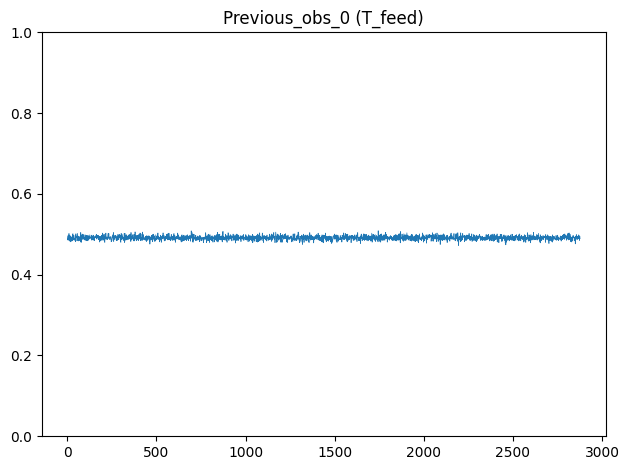

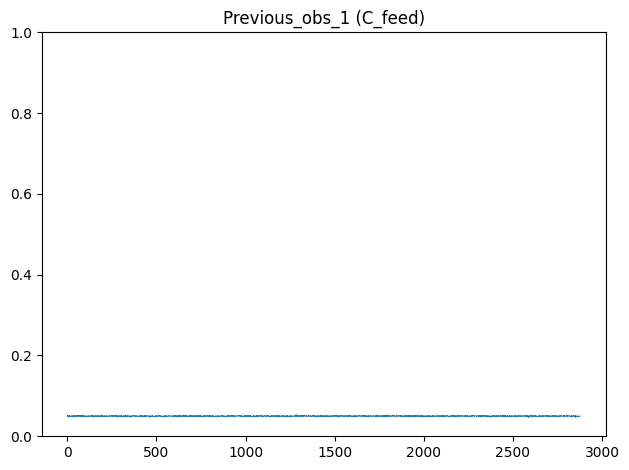

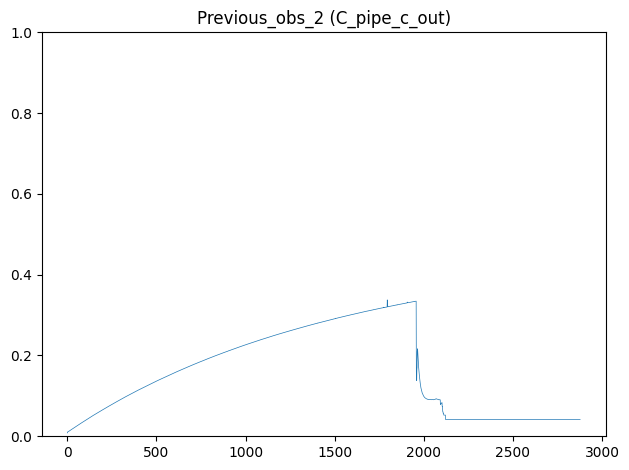

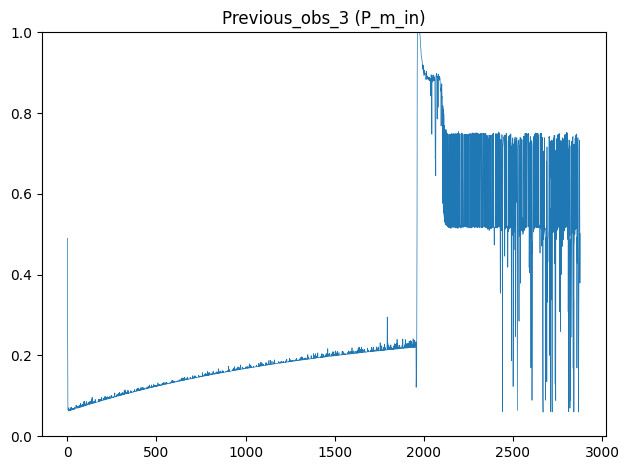

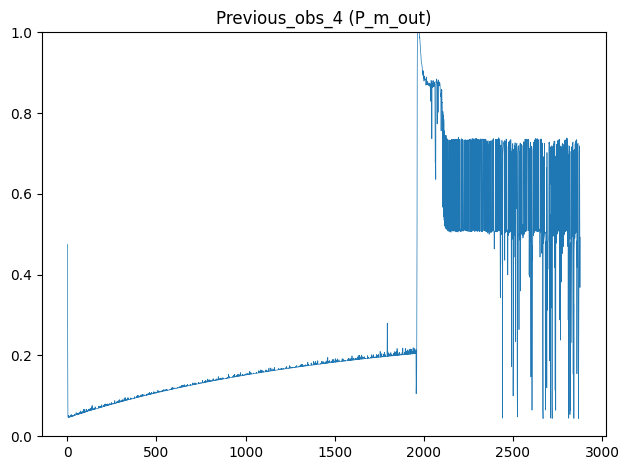

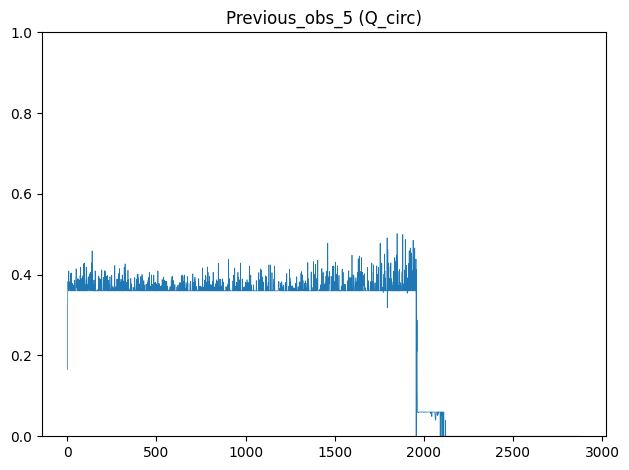

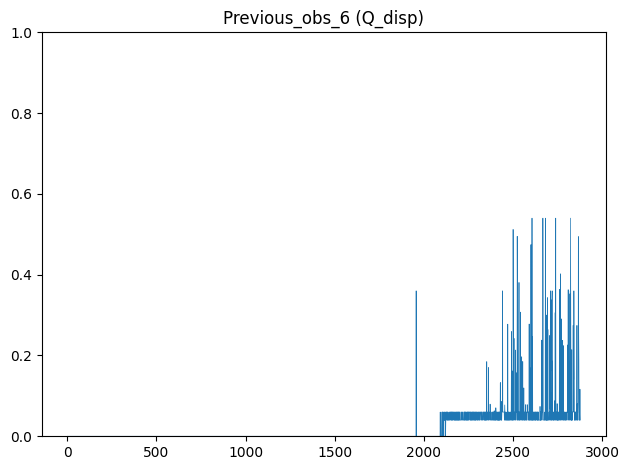

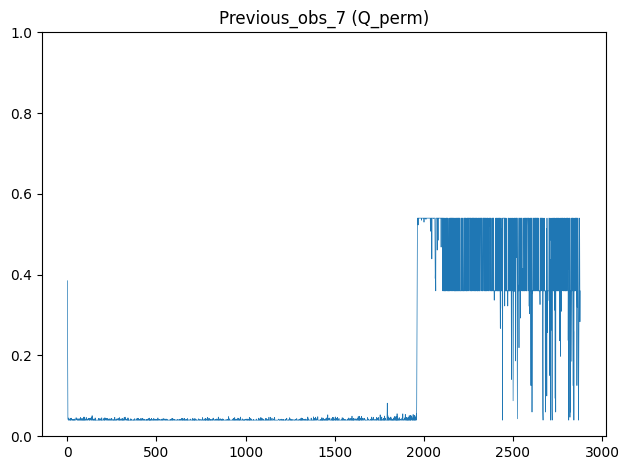

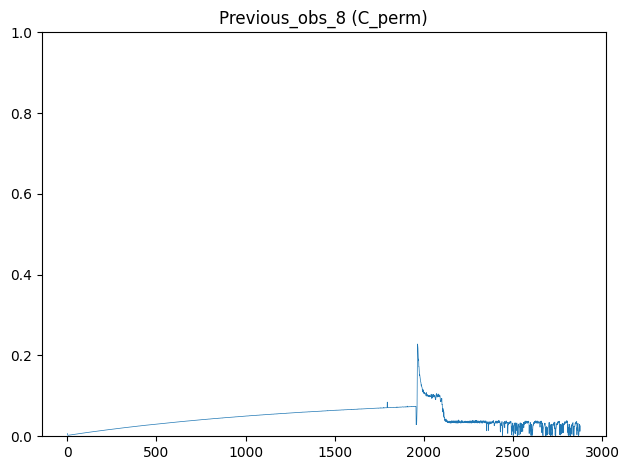

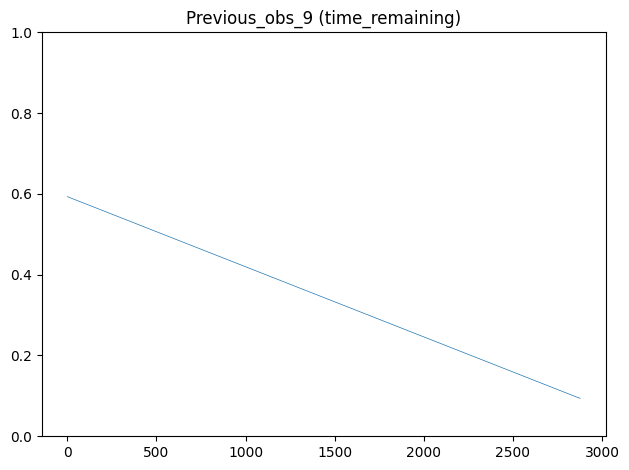

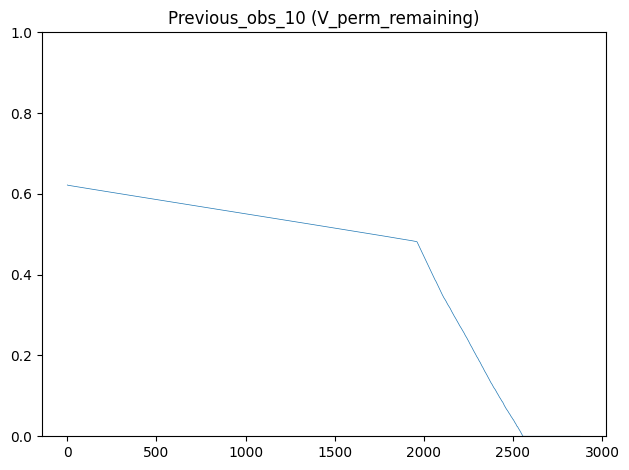

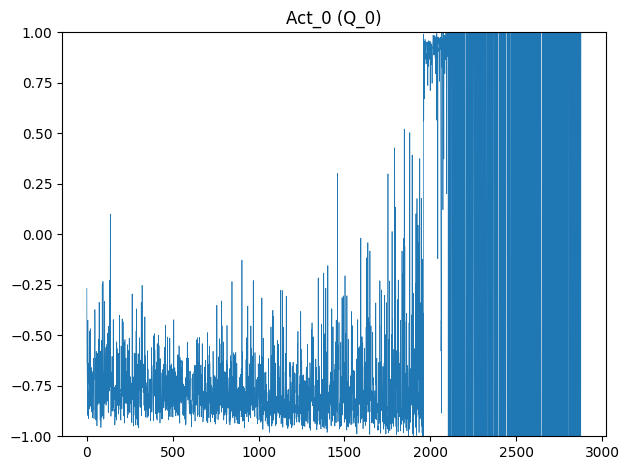

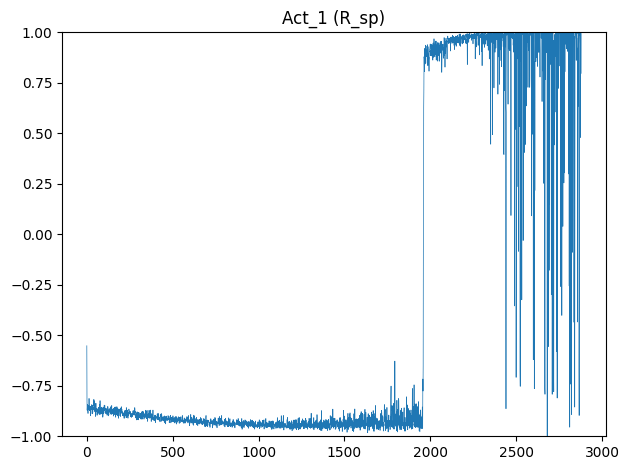

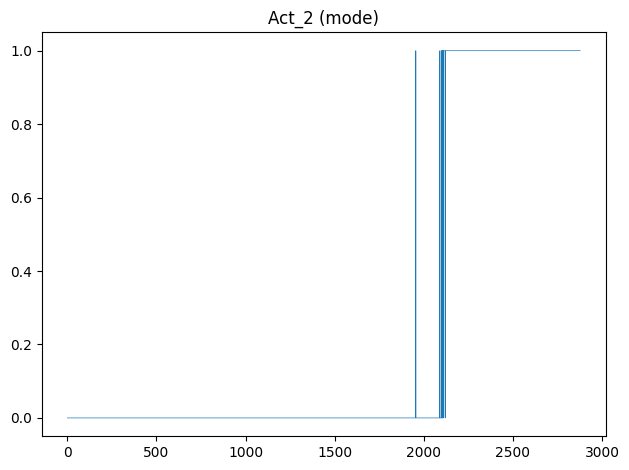

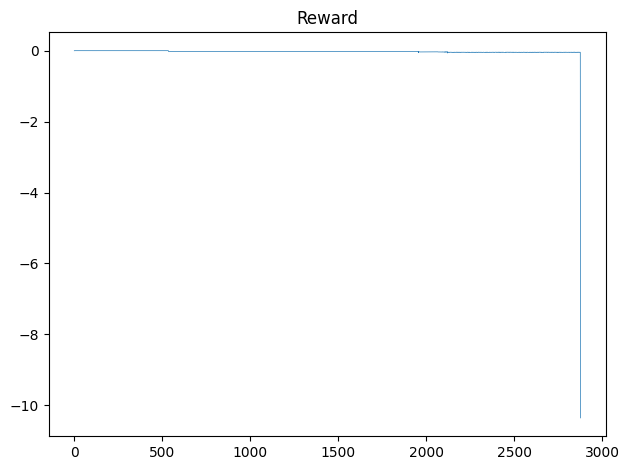

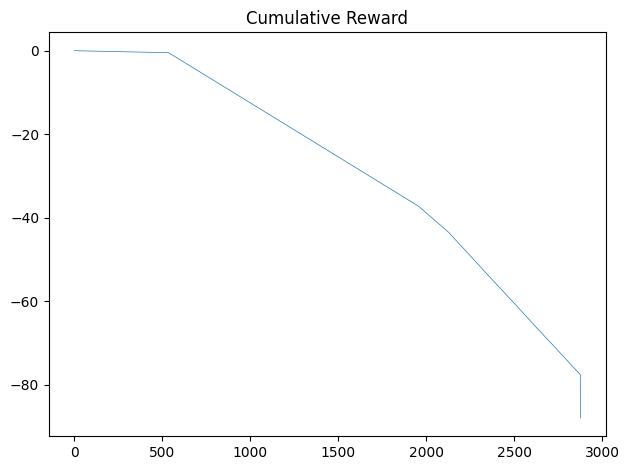

In [121]:
episode_n = -1

for i in range(11):
    plt.plot(result_dfs[episode_n][f"Previous_obs_{i}"], lw=0.5)
    plt.title(f"Previous_obs_{i} ({obs_names[i]})")
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"Previous_obs_{i} ({obs_names[i]}).pdf"))
    plt.show()

for j in range(2):
    plt.plot(np.tanh(result_dfs[episode_n][f"Act_{j}"]), lw=0.5)
    plt.ylim([-1, 1])
    plt.title(f"Act_{j} ({action_names[j]})")
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"Act_{j} ({action_names[j]}).pdf"))
    plt.show()

plt.plot(result_dfs[episode_n]["Act_2"], lw=0.5)
plt.title(f"Act_2 ({action_names[2]})")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, f"Act_2 ({action_names[2]}).pdf"))
plt.show()

plt.plot(result_dfs[episode_n]["Reward"], lw=0.5)
plt.title("Reward")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "Reward.pdf"))
plt.show()

plt.plot(np.cumsum(result_dfs[episode_n]["Reward"]), lw=0.5)
plt.title("Cumulative Reward")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "Cumulative Reward.pdf"))
plt.show()


num_training_step_calls_per_iteration
num_env_steps_sampled_lifetime
num_env_steps_sampled_lifetime_throughput
done
training_iteration
trial_id
date
timestamp
time_this_iter_s
time_total_s
pid
hostname
node_ip
time_since_restore
iterations_since_restore
timers/training_iteration
timers/restore_env_runners
timers/training_step
timers/env_runner_sampling_timer
timers/learner_update_timer
timers/synch_weights
env_runners/env_to_module_sum_episodes_length_out
env_runners/episode_return_mean
env_runners/num_episodes
env_runners/env_reset_timer
env_runners/num_episodes_lifetime
env_runners/episode_return_min
env_runners/weights_seq_no
env_runners/env_step_timer
env_runners/episode_duration_sec_mean
env_runners/sample
env_runners/rlmodule_inference_timer
env_runners/episode_len_mean
env_runners/env_to_module_sum_episodes_length_in
env_runners/num_env_steps_sampled
env_runners/num_env_steps_sampled_lifetime
env_runners/episode_len_min
env_runners/episode_return_max
env_runners/episode_len_max


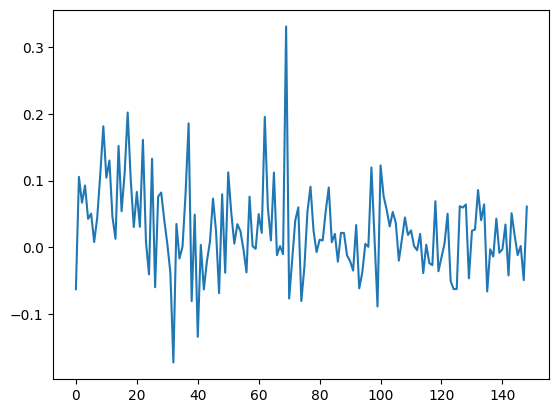

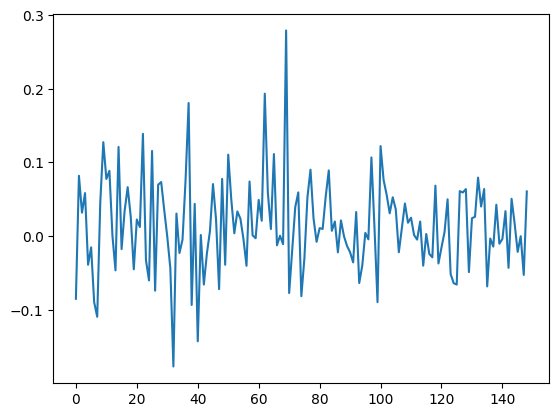

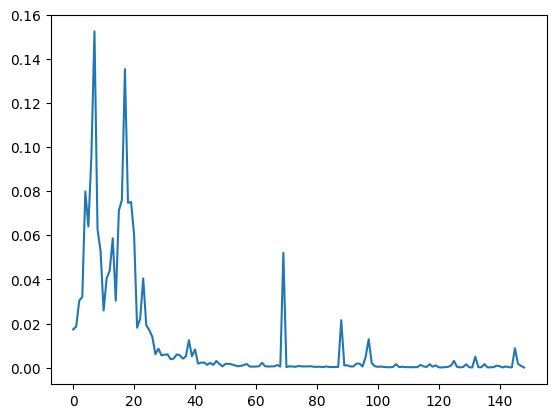

In [122]:
process_df = pl.read_csv(
    "/home/ybang-eai/research/2025/SBRO/SBRORL/result/PPO/2025-06-16 13:49:15.548298/PPO_SBRO_Custom_Configs_run_FIXED/PPO_sbro_env_v1_41496_00000_0_2025-06-16_13-49-15/progress.csv"
)

for col in process_df.columns:
    print(col)

plt.plot(process_df["learners/default_policy/total_loss"])
plt.show()

plt.plot(process_df["learners/default_policy/policy_loss"])
plt.show()


plt.plot(process_df["learners/default_policy/vf_loss"])
plt.show()


In [ ]:

import orjson

def load_rllib_results(file_path):
    """
    Loads an RLlib result.json file into a pandas DataFrame.

    Each line in result.json is a separate JSON object. This function
    reads the file line by line, parses each line with orjson, and
    compiles them into a DataFrame.

    Args:
        file_path: The path to the result.json file.

    Returns:
        A pandas DataFrame containing the experiment results.
    """
    data = []
    print(f"Loading results from: {file_path}")
    
    # Ensure the file exists before proceeding
    if not file_path.is_file():
        raise FileNotFoundError(f"Result file not found at: {file_path}")

    # Open the file and read it line by line
    with open(file_path, 'r') as f:
        for line in f:
            # Skip empty lines, which can sometimes occur at the end of the file
            if not line.strip():
                continue
            try:
                # orjson.loads() parses a single JSON object from a string/bytes
                data.append(orjson.loads(line))
            except orjson.JSONDecodeError:
                print(f"Warning: Skipping a malformed line: {line.strip()}")

    if not data:
        print("Warning: No data was loaded. The file might be empty or contain only malformed lines.")
        return pl.DataFrame()

    print(f"Successfully loaded {len(data)} training iterations.")
    
    # Convert the list of dictionaries to a pandas DataFrame
    return pl.DataFrame(data)

from pathlib import Path # <-- Make sure you have this import

# Your file path as a string
file_path_str = "/home/ybang-eai/research/2025/SBRO/SBRORL/result/PPO/2025-06-14 21:07:48.180313/PPO_SBRO_Custom_Configs_run_FIXED/PPO_sbro_env_v1_3005d_00000_0_2025-06-14_21-07-48/result.json"

# Convert the string to a Path object before calling the function
path_obj = Path(file_path_str) 

# Now call the function with the Path object
result_json = load_rllib_results(path_obj)

result_json

